In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train , y_train) , (x_test,y_test) = tf.keras.datasets.mnist.load_data()

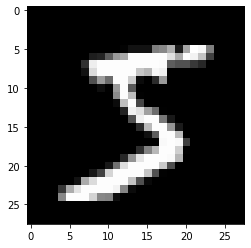

In [3]:
plt.imshow(x_train[0] , cmap="gray")

In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
encoder_input = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(encoder_input)
encoder_output= keras.layers.Dense(64,activation="relu")(x)

encoder = keras.Model(encoder_input,encoder_output, name="encoder")

decoder_input = keras.layers.Dense(784,activation="relu")(encoder_output)
# x = keras.layers.Dense(784,activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28,28,1))(decoder_input)

opt = keras.optimizers.Adam(lr=0.001,decay = 1e-6)

autoencoder = keras.Model(encoder_input,decoder_output,name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.compile(opt,loss="mse")

In [8]:
autoencoder.fit(x_train,x_train, epochs=8 , batch_size=32 , validation_split=0.1)

Epoch 1/8
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0272 - val_loss: 0.0105
Epoch 2/8
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 3/8
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 4/8
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/8
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/8
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 7/8
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 8/8
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0091 - val_loss: 0.0092


In [9]:
example = encoder.predict([x_test[0].reshape(-1,28,28,1)])
print(example[0])

[1.0157686  0.         1.5441142  0.2618993  1.9944835  1.1873801
 1.020691   1.5900704  0.78833085 0.4050912  0.8697845  0.47463214
 0.68200815 0.25765252 0.531793   0.2703143  0.82185173 0.90175176
 0.939633   0.5505391  1.9449202  1.9133894  0.8458111  1.0743316
 0.43209386 0.02463248 1.6504219  1.844139   0.36945897 1.2725861
 1.3919225  0.5944691  1.7999861  1.6977084  0.76014715 0.24123
 1.2004935  0.42237073 0.05594513 1.037761   0.41821373 0.49427772
 0.5332576  0.7866805  0.         0.5010419  0.71424556 0.5451559
 0.83178824 1.06273    0.9741696  2.3309073  0.32499123 0.392019
 0.94660676 1.4550872  1.5809875  0.88304794 1.1249009  0.7262988
 0.47608697 1.6463456  1.1856401  1.9751849 ]


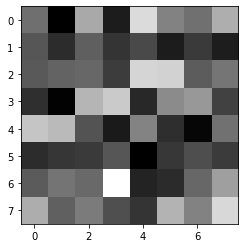

In [10]:
 plt.imshow(example[0].reshape((8,8)),cmap="gray")

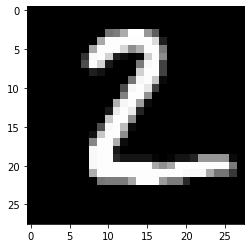

In [13]:
 plt.imshow(x_test[1],cmap="gray")

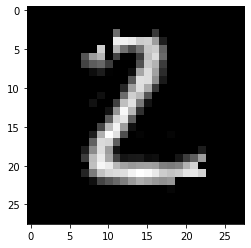

In [14]:
a_out = autoencoder.predict([x_test[1].reshape(-1,28,28,1)])[0]
plt.imshow(a_out,cmap="gray")